In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json

### Plot Learnability Scores

In [2]:
# provide a path to the learnability score outputs:
paths = ["en_field_auc_w10_e10.json",
         "en_field_auc_w10_e10-s1234.json",
         "en_field_auc_w5_e5.json",
         "en_field_auc_w5_e5-s1234.json"]   
aucs = {}
metric =  "auc"
for path in paths:
    with open(path, "rt") as fin:
        data = json.load(fin)
    for val in data:
        qid = val["qid"]
        relation_name = val["relation"]
        key = (qid, relation_name)
        if key not in aucs:
            aucs[key] = [val[metric]]
        else:
            aucs[key].append(val[metric])

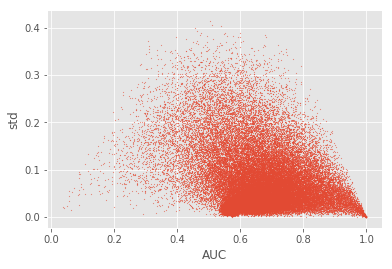

In [11]:
#plt.title("Trial difference is not correlated with " + metric.upper());
plt.scatter(
    [np.mean(v) for (_, relation_name), v in aucs.items()],
    [np.std(v) for (_, relation_name), v in aucs.items()],
    s=0.5,
    alpha=0.5
);
plt.ylabel("std");
plt.xlabel("AUC");
plt.savefig("auc-std.pdf");

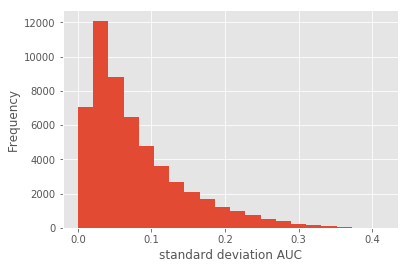

In [7]:
plt.style.use("ggplot")
#plt.title("Difference in trials are small");
plt.hist([np.std(v) for k, v in aucs.items()], bins=20);
plt.xlabel("standard deviation %s" % (metric.upper(),));
plt.ylabel("Frequency");
plt.savefig("auc-dev-frequency.pdf");

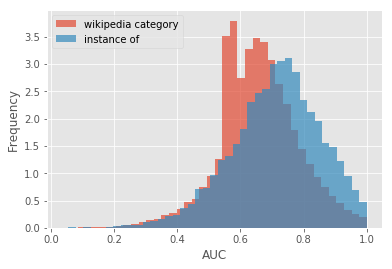

In [12]:
plt.style.use("ggplot")
#plt.title("Most %ss are fairly high" % (metric.upper(),));
for label in ["category_link", "instance of"]:
    plt.hist([np.mean(v) for (_, relation_name), v in aucs.items() if relation_name == label], bins=40, alpha=0.7, normed=True, label=label);
plt.legend(["wikipedia category", "instance of"]);
plt.xlabel(metric.upper());
plt.ylabel("Frequency");
plt.savefig("auc-hist.pdf");